# Item2Vec
Item2Vec: Neural Item Embedding for Collaborative Filtering
***

## References
- Paper: https://arxiv.org/vc/arxiv/papers/1603/1603.04259v2.pdf
- Dataset: https://grouplens.org/datasets/movielens/
- Source Code:
https://github.com/bwange/Item2vec_Tutorial_with_Recommender_System_Application/blob/master/Making_Your_Own_Recommender_System_with_Item2Vec.ipynb

***

##  Preparing the Data
- MovieLens 데이터셋을 사용하여 데이터를 읽습니다.


In [16]:
import pandas as pd
import numpy as np

# 데이터 읽기
df_movies = pd.read_csv('../dataset/ml-20m/movies.csv') # 영화 데이터
df_ratings = pd.read_csv('../dataset/ml-20m/ratings.csv') # user의 rating 데이터

# 인코딩
movieId_to_name = pd.Series(df_movies.title.values, index = df_movies.movieId.values)
name_to_movieId = pd.Series(df_movies.movieId.values, index = df_movies.title).to_dict()

# Randomly display 5 records in the dataframe
for df in list((df_movies, df_ratings)):
    rand_idx = np.random.choice(len(df), 5, replace=False)
    display(df.iloc[rand_idx,:])
    print("Randomly displaying 5 of the total "+str(len(df))+" data points")

,movieId,title,genres
1522,1573,Face/Off (1997),Action|Crime|Drama|Thriller
15628,79551,Shifty (2008),Crime|Thriller
10149,33675,After You (Après vous...) (2003),Comedy|Romance
17026,86288,"Day the Universe Changed, The (1985)",Documentary
8135,8818,It Happened at the World's Fair (1963),Comedy|Drama|Musical


Randomly displaying 5 of the total 27278 data points


,userId,movieId,rating,timestamp
1407419,9535,2918,3.5,1111483455
11903870,82171,253,2.5,1111477323
15239475,105343,4443,3.5,1181327416
12132651,83811,10,4.0,839944095
11132238,76930,3489,4.0,1418475627


Randomly displaying 5 of the total 20000263 data points


## Rating Histogram
- User가 rating한 영화의 개수를 히스토그램으로 시각화합니다.

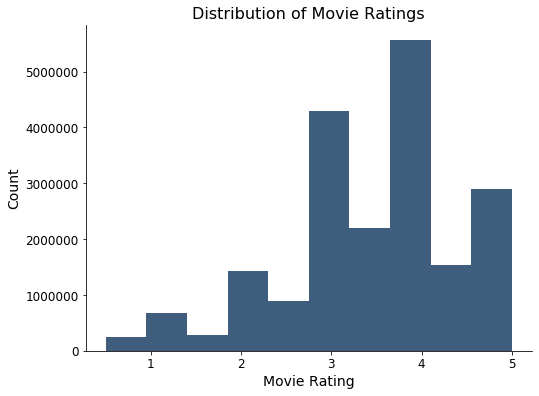

In [22]:
import matplotlib.pyplot as plt
import chart_studio.plotly as py
%matplotlib inline

plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set_title("Distribution of Movie Ratings", fontsize=16)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
  
plt.xlabel("Movie Rating", fontsize=14)  
plt.ylabel("Count", fontsize=14)  
  
plt.hist(df_ratings['rating'], color="#3F5D7D")  

plt.show()

##  train set, test set 만들기
- ratings 데이터의 학습데이터와 테스트데이터를 분리합니다.

In [30]:
from sklearn.model_selection import train_test_split

df_ratings_train, df_ratings_test= train_test_split(df_ratings,
                                                    stratify=df_ratings['userId'],
                                                    random_state = 15688,
                                                    test_size=0.30)


print("Number of training data: "+str(len(df_ratings_train)))
print("Number of test data: "+str(len(df_ratings_test)))

Number of training data: 14000184
Number of test data: 6000079


In [31]:
def rating_splitter(df):
    
    df['liked'] = np.where(df['rating']>=4, 1, 0) # df['rating']이 4이상이면 1 아니면 0
    df['movieId'] = df['movieId'].astype('str')
    gp_user_like = df.groupby(['liked', 'userId']) # liked와 user_id로 그룹화

    return ([gp_user_like.get_group(gp)['movieId'].tolist() for gp in gp_user_like.groups])

In [32]:
pd.options.mode.chained_assignment = None
splitted_movies = rating_splitter(df_ratings_train)

In [33]:
splitted_movies.head(5)

AttributeError: 'list' object has no attribute 'head'

***
## 모델 생성 및 학습